# Unit 20.3: Dataset Storytelling
Using the IMDb dataset (https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset), I highlight unique patterns in movie preferences between males and females

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly

In c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
f1 = "IMDb movies.csv"
f2 = "IMDb names.csv"
f3 = "IMDb ratings.csv"
f4 = "IMDb title_principals.csv"

df = pd.read_csv('imdb_data/'+f1)
# df2 = pd.read_csv('imdb_data/'+f2) # didn't end up using
df3 = pd.read_csv('imdb_data/'+f3)
# df4 = pd.read_csv('imdb_data/'+f4) # didn't end up using

In [3]:
df3 = df3[(df3['males_allages_votes']>500) & (df3['females_allages_votes']>500)].dropna()
df3 = df3[['imdb_title_id','total_votes','mean_vote','males_allages_avg_vote','females_allages_avg_vote','males_allages_votes','females_allages_votes']]
df3['M-F'] = df3.males_allages_avg_vote - df3.females_allages_avg_vote

In [4]:
df3.head()

,imdb_title_id,total_votes,mean_vote,males_allages_avg_vote,females_allages_avg_vote,males_allages_votes,females_allages_votes,M-F
45,tt0004972,20885,6.5,6.5,5.8,14064.0,2314.0,0.7
73,tt0006864,13116,7.9,7.8,7.5,8980.0,1569.0,0.3
155,tt0010323,51644,7.9,8.1,8.1,33703.0,7322.0,0.0
179,tt0011130,4477,7.1,7.0,7.1,3094.0,584.0,-0.1
238,tt0012349,101619,8.2,8.3,8.4,65142.0,11632.0,-0.1


In [5]:
dfall = pd.merge(df,df3)
dfall = dfall[['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'total_votes',
       'mean_vote', 'males_allages_avg_vote', 'females_allages_avg_vote', 'males_allages_votes', 'females_allages_votes',
       'M-F']].sort_values('M-F')
dfall = dfall[(dfall.language.str.contains('English',na=False) & dfall.country.str.contains('USA',na=False))]

In [6]:
dfall.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,total_votes,mean_vote,males_allages_avg_vote,females_allages_avg_vote,males_allages_votes,females_allages_votes,M-F
6469,tt3781762,1915,1915,2015,2015-04-23,Drama,82,USA,English,"Garin Hovannisian, Alec Mouhibian",...,$ 111682,$ 111682,NaN,4459,6.1,3.7,7.3,2365.0,893.0,-3.6
6296,tt3398252,Samurai Cop 2: Deadly Vengeance,Samurai Cop 2: Deadly Vengeance,2015,2015-10-09,"Action, Crime, Thriller",94,USA,English,Gregory Hatanaka,...,NaN,NaN,NaN,3389,7.0,4.8,8.3,2252.0,776.0,-3.5
6800,tt4776998,The Promise,The Promise,2016,2017-04-28,"Action, Adventure, Drama",133,"Spain, USA","English, Armenian, German, French, Turkish",Terry George,...,$ 8224288,$ 12448676,49.0,165265,6.1,5.5,8.7,78195.0,40714.0,-3.2
6643,tt4282872,Dead Story,Dead Story,2017,2017-01-20,Horror,81,USA,English,Suneel Tripuraneni,...,NaN,NaN,NaN,3549,6.8,4.0,6.9,1345.0,1913.0,-2.9
7297,tt6730898,Lazer Team 2,Lazer Team 2,2018,2017-11-13,Sci-Fi,86,USA,English,"Daniel Fabelo, Matt Hullum",...,NaN,$ 19988,NaN,2458,7.9,5.8,8.6,1250.0,990.0,-2.8


### The below chart highlights the largest differences between male and female user ratings

Text(0.5, 1.0, 'IMDb User Ratings: Top 10 Largest Male vs. Females Differences')

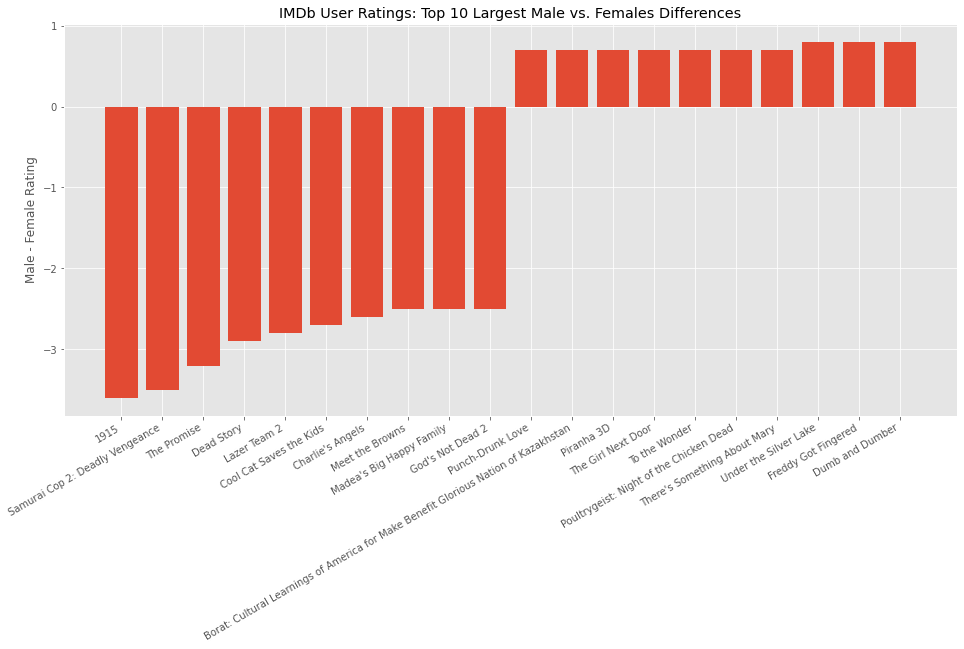

In [7]:
data = pd.concat([dfall.head(10),dfall.tail(10)])

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(data['title'],data['M-F'])
fig.autofmt_xdate() 
plt.ylabel('Male - Female Rating')
plt.title('IMDb User Ratings: Top 10 Largest Male vs. Females Differences')

### We can use the interactive plot below to investigate the full dataset, plotted against IMDb's Metascore rating

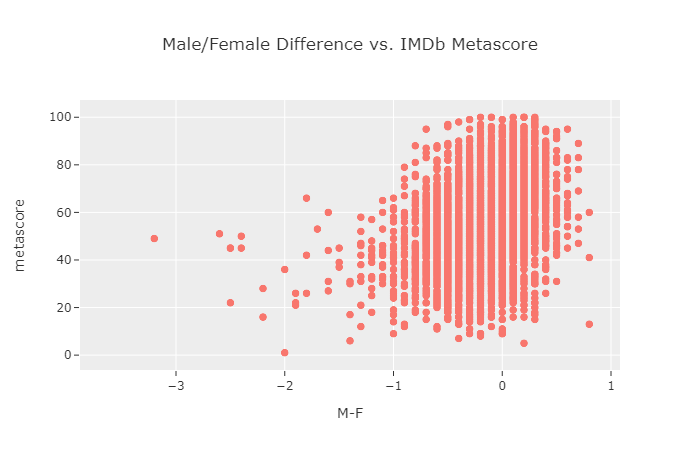

In [13]:
# fig = px.scatter(dfall, x="M-F", y="mean_vote", hover_data=['title'])
fig = px.scatter(dfall, x="M-F", y="metascore", hover_data=['title'],title='Male/Female Difference vs. IMDb Metascore',template='ggplot2')
# fig.show()
fig.show("png")


### Furthermore, we can filter this plot by genre to find more interesting trends
### For example, Musicals are almost unanimously rated higher by females than males

In [14]:
gs = ['Comedy','Drama','Romance','Horror','Thriller','Action','Western','Sport','Musical','Crime','Sci-Fi','Mystery']

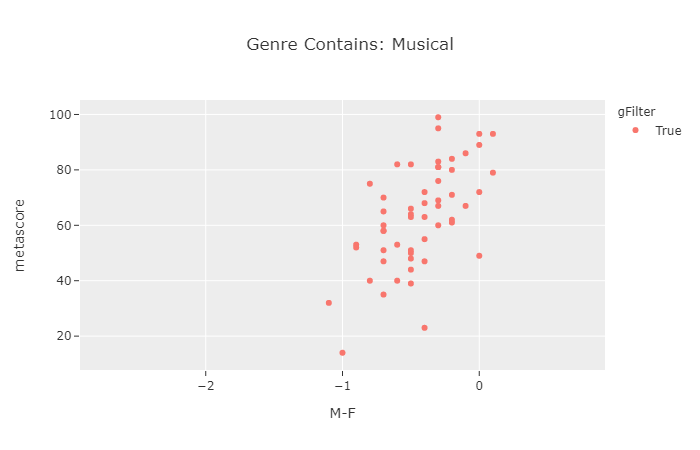

In [15]:
g = 'Musical'
dfall['gFilter']=dfall.genre.str.contains(g,na=False)
fig = px.scatter(dfall[dfall['gFilter']], x="M-F", y="metascore", hover_data=['title'],color="gFilter",title='Genre Contains: '+str(g),template='ggplot2')
# fig.show()
fig.show('png')

### Or we can filter by Actor
### This confirms some maybe intuitive predictions, such that women generally rate movies starring Meryl Streep higher than men

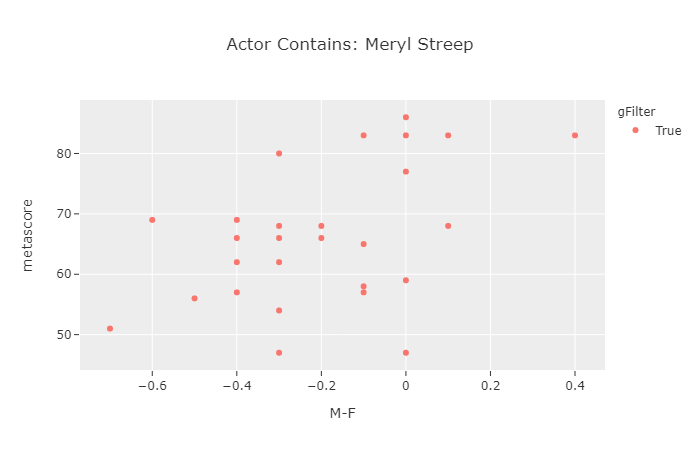

In [16]:
g = 'Meryl Streep'
dfall['gFilter']=dfall.actors.str.contains(g,na=False)
fig = px.scatter(dfall[dfall['gFilter']], x="M-F", y="metascore", hover_data=['title'],color="gFilter",title='Actor Contains: '+str(g),template='ggplot2')
# fig.show()
fig.show('png')

### But it also shows some surprising results, like the fact that women also rate movies starring Dwayne "The Rock" Johnson also higher than men

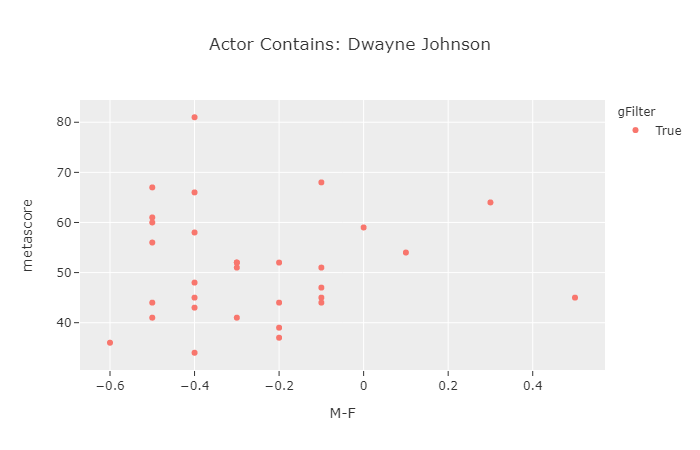

In [17]:
g = 'Dwayne Johnson'
dfall['gFilter']=dfall.actors.str.contains(g,na=False)
fig = px.scatter(dfall[dfall['gFilter']], x="M-F", y="metascore", hover_data=['title'],color="gFilter",title='Actor Contains: '+str(g),template='ggplot2')
# fig.show()
fig.show('png')